In [1]:
import tensorflow as tf
print(tf.__version__)
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import numpy as np

2.3.0


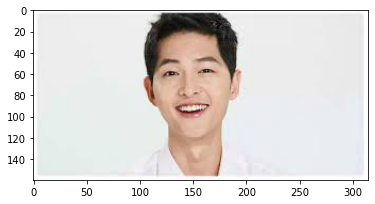

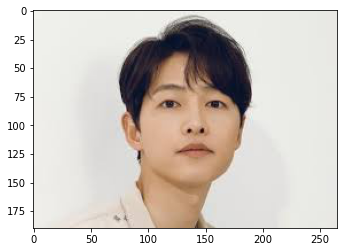

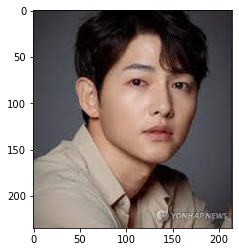

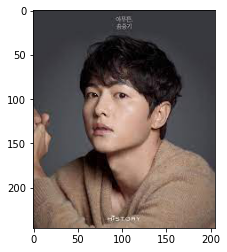

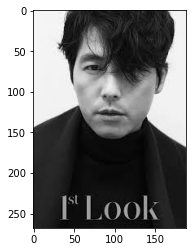

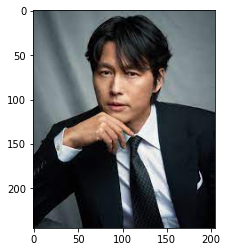

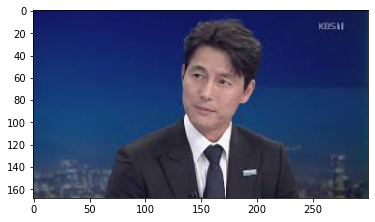

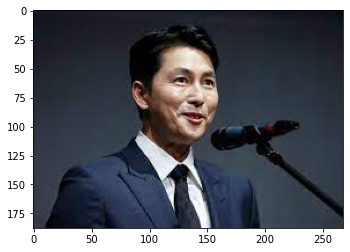

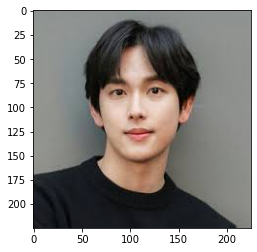

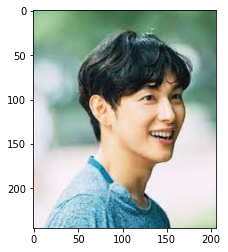

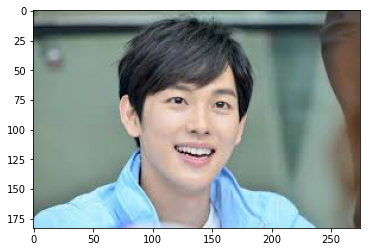

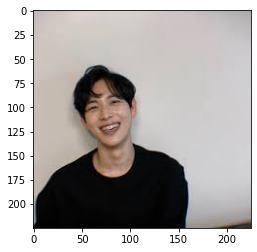

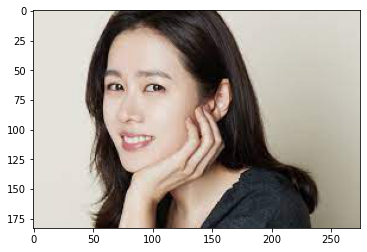

In [2]:
for idx in range(4):    
    cat = Image.open('s'+str(idx)+'.jpg')
    cat = np.array(cat)
    plt.figure()
    plt.imshow(cat)
    
for idx in range(4):    
    cat = Image.open('j'+str(idx)+'.jpg')
    cat = np.array(cat)
    plt.figure()
    plt.imshow(cat)
    
for idx in range(4):    
    cat = Image.open('l'+str(idx)+'.jpg')
    cat = np.array(cat)
    plt.figure()
    plt.imshow(cat)
    
cat = Image.open('syj.jpg')
cat = np.array(cat)
plt.figure()
plt.imshow(cat)

In [3]:
x_train = np.zeros((9,32*32))
for idx in range(3):    
    cat = cv2.imread('s'+str(idx)+'.jpg',cv2.IMREAD_GRAYSCALE)
    cat = cv2.resize(cat,(32,32))
    x_train[idx,:] = cat.reshape(-1)
    
for idx in range(3):    
    cat = cv2.imread('j'+str(idx)+'.jpg',cv2.IMREAD_GRAYSCALE)
    cat = cv2.resize(cat,(32,32))
    x_train[idx+3,:] = cat.reshape(-1)
    
for idx in range(3):    
    cat = cv2.imread('l'+str(idx)+'.jpg',cv2.IMREAD_GRAYSCALE)
    cat = cv2.resize(cat,(32,32))
    x_train[idx+6,:] = cat.reshape(-1)

y_train = np.array([0,0,0,1,1,1,2,2,2])

print('x_train',x_train.shape)
print('y_train',y_train.shape)

x_train (9, 1024)
y_train (9,)


In [4]:
x_test = np.zeros((4,32*32))

cat = cv2.imread('s3.jpg',cv2.IMREAD_GRAYSCALE)
cat = cv2.resize(cat,(32,32))
x_test[0,:] = cat.reshape(-1)
    
cat = cv2.imread('j3.jpg',cv2.IMREAD_GRAYSCALE)
cat = cv2.resize(cat,(32,32))
x_test[1,:] = cat.reshape(-1)

cat = cv2.imread('l3.jpg',cv2.IMREAD_GRAYSCALE)
cat = cv2.resize(cat,(32,32))
x_test[2,:] = cat.reshape(-1)

cat = cv2.imread('syj.jpg',cv2.IMREAD_GRAYSCALE)
cat = cv2.resize(cat,(32,32))
x_test[3,:] = cat.reshape(-1)

y_test = np.array([0,1,2,3])

print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_test (4, 1024)
y_test (4,)


In [5]:
x_train = x_train.reshape(x_train.shape[0],-1)/255.
x_test = x_test.reshape(x_test.shape[0],-1)/255.

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train[0]

array([1., 0., 0.], dtype=float32)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(200, input_dim=(32*32), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
Total params: 230,315
Trainable params: 230,315
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 16ms/step - loss: 1.1621 - accuracy: 0.3333
Epoch 2/200
1/1 [==============================] - 0s 999us/step - loss: 1.0778 - accuracy: 0.4444
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 1.0025 - accuracy: 0.4444
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 0.9501 - accuracy: 0.4444
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 0.9115 - accuracy: 0.4444
Epoch 6/200
1/1 [==============================] - 0s 981us/step - loss: 0.8767 - accuracy: 0.4444
Epoch 7/200
1/1 [==============================] - 0s 995us/step - loss: 0.8375 - accuracy: 0.4444
Epoch 8/200
1/1 [==============================] - 0s 998us/step - loss: 0.8139 - accuracy: 0.4444
Epoch 9/200
1/1 [==============================] - 0s 999us/step - loss: 0.7954 - accuracy: 0.5556
Epoch 10/200
1/1 [==============================] - 0s 0s/step - loss: 0.7480 - accuracy: 0.5556
Epoch 11/200
1/1 [=

1/1 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 1.0000
Epoch 85/200
1/1 [==============================] - 0s 0s/step - loss: 0.3320 - accuracy: 1.0000
Epoch 86/200
1/1 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 1.0000
Epoch 87/200
1/1 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 1.0000
Epoch 88/200
1/1 [==============================] - 0s 1000us/step - loss: 0.3307 - accuracy: 1.0000
Epoch 89/200
1/1 [==============================] - 0s 998us/step - loss: 0.3302 - accuracy: 1.0000
Epoch 90/200
1/1 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 1.0000
Epoch 91/200
1/1 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 1.0000
Epoch 92/200
1/1 [==============================] - 0s 1000us/step - loss: 0.3287 - accuracy: 1.0000
Epoch 93/200
1/1 [==============================] - 0s 999us/step - loss: 0.3282 - accuracy: 1.0000
Epoch 94/200
1/1 [======

1/1 [==============================] - 0s 999us/step - loss: 0.2971 - accuracy: 1.0000
Epoch 167/200
1/1 [==============================] - 0s 1000us/step - loss: 0.2967 - accuracy: 1.0000
Epoch 168/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2963 - accuracy: 1.0000
Epoch 169/200
1/1 [==============================] - 0s 998us/step - loss: 0.2960 - accuracy: 1.0000
Epoch 170/200
1/1 [==============================] - 0s 999us/step - loss: 0.2956 - accuracy: 1.0000
Epoch 171/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 1.0000
Epoch 172/200
1/1 [==============================] - 0s 1000us/step - loss: 0.2948 - accuracy: 1.0000
Epoch 173/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2945 - accuracy: 1.0000
Epoch 174/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 1.0000
Epoch 175/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2939 - accuracy: 1.0000
Epoch 176/20

In [9]:
from sklearn.metrics import f1_score
from sklearn import metrics
pred = model.predict(x_test)
pred_idx = np.argmax(pred, axis=1)
print(metrics.classification_report(y_test, pred_idx))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.12      0.25      0.17         4
weighted avg       0.12      0.25      0.17         4



C:\Users\etriai03\.conda\envs\rdl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\etriai03\.conda\envs\rdl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\etriai03\.conda\envs\rdl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
